In [12]:
import pandas as pd
import numpy as np

# 讀取CSV檔案
df = pd.read_csv('Alldata_raw_delta_log_2014.csv')

#print(df.dtypes)

# 計算accumulated return並存儲到新的column中
for column in df.columns[1:20]:
    p1 = df.at[len(df) - 1, column]  # 最舊那一天的價格
    df['AR_' + column] = np.log(df[column] / p1)

# 4個指標非從第一天開始算，沒有p1，所以要分開算
for column in df.columns[20:24]:
    p2 = df.at[len(df) - 22, column]  # 最舊那一天的價格
    df['AR_' + column] = np.log(df[column] / p2)
    
# 將結果存儲為新的CSV檔案
df.to_csv('Alldata_raw_delta_log_AR.csv', index=False)


C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
import pandas as pd
import numpy as np
from datetime import datetime

data = pd.read_csv('Alldata_raw_delta_log_AR.csv')
data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x, '%d-%b-%y'))

## Raw Data

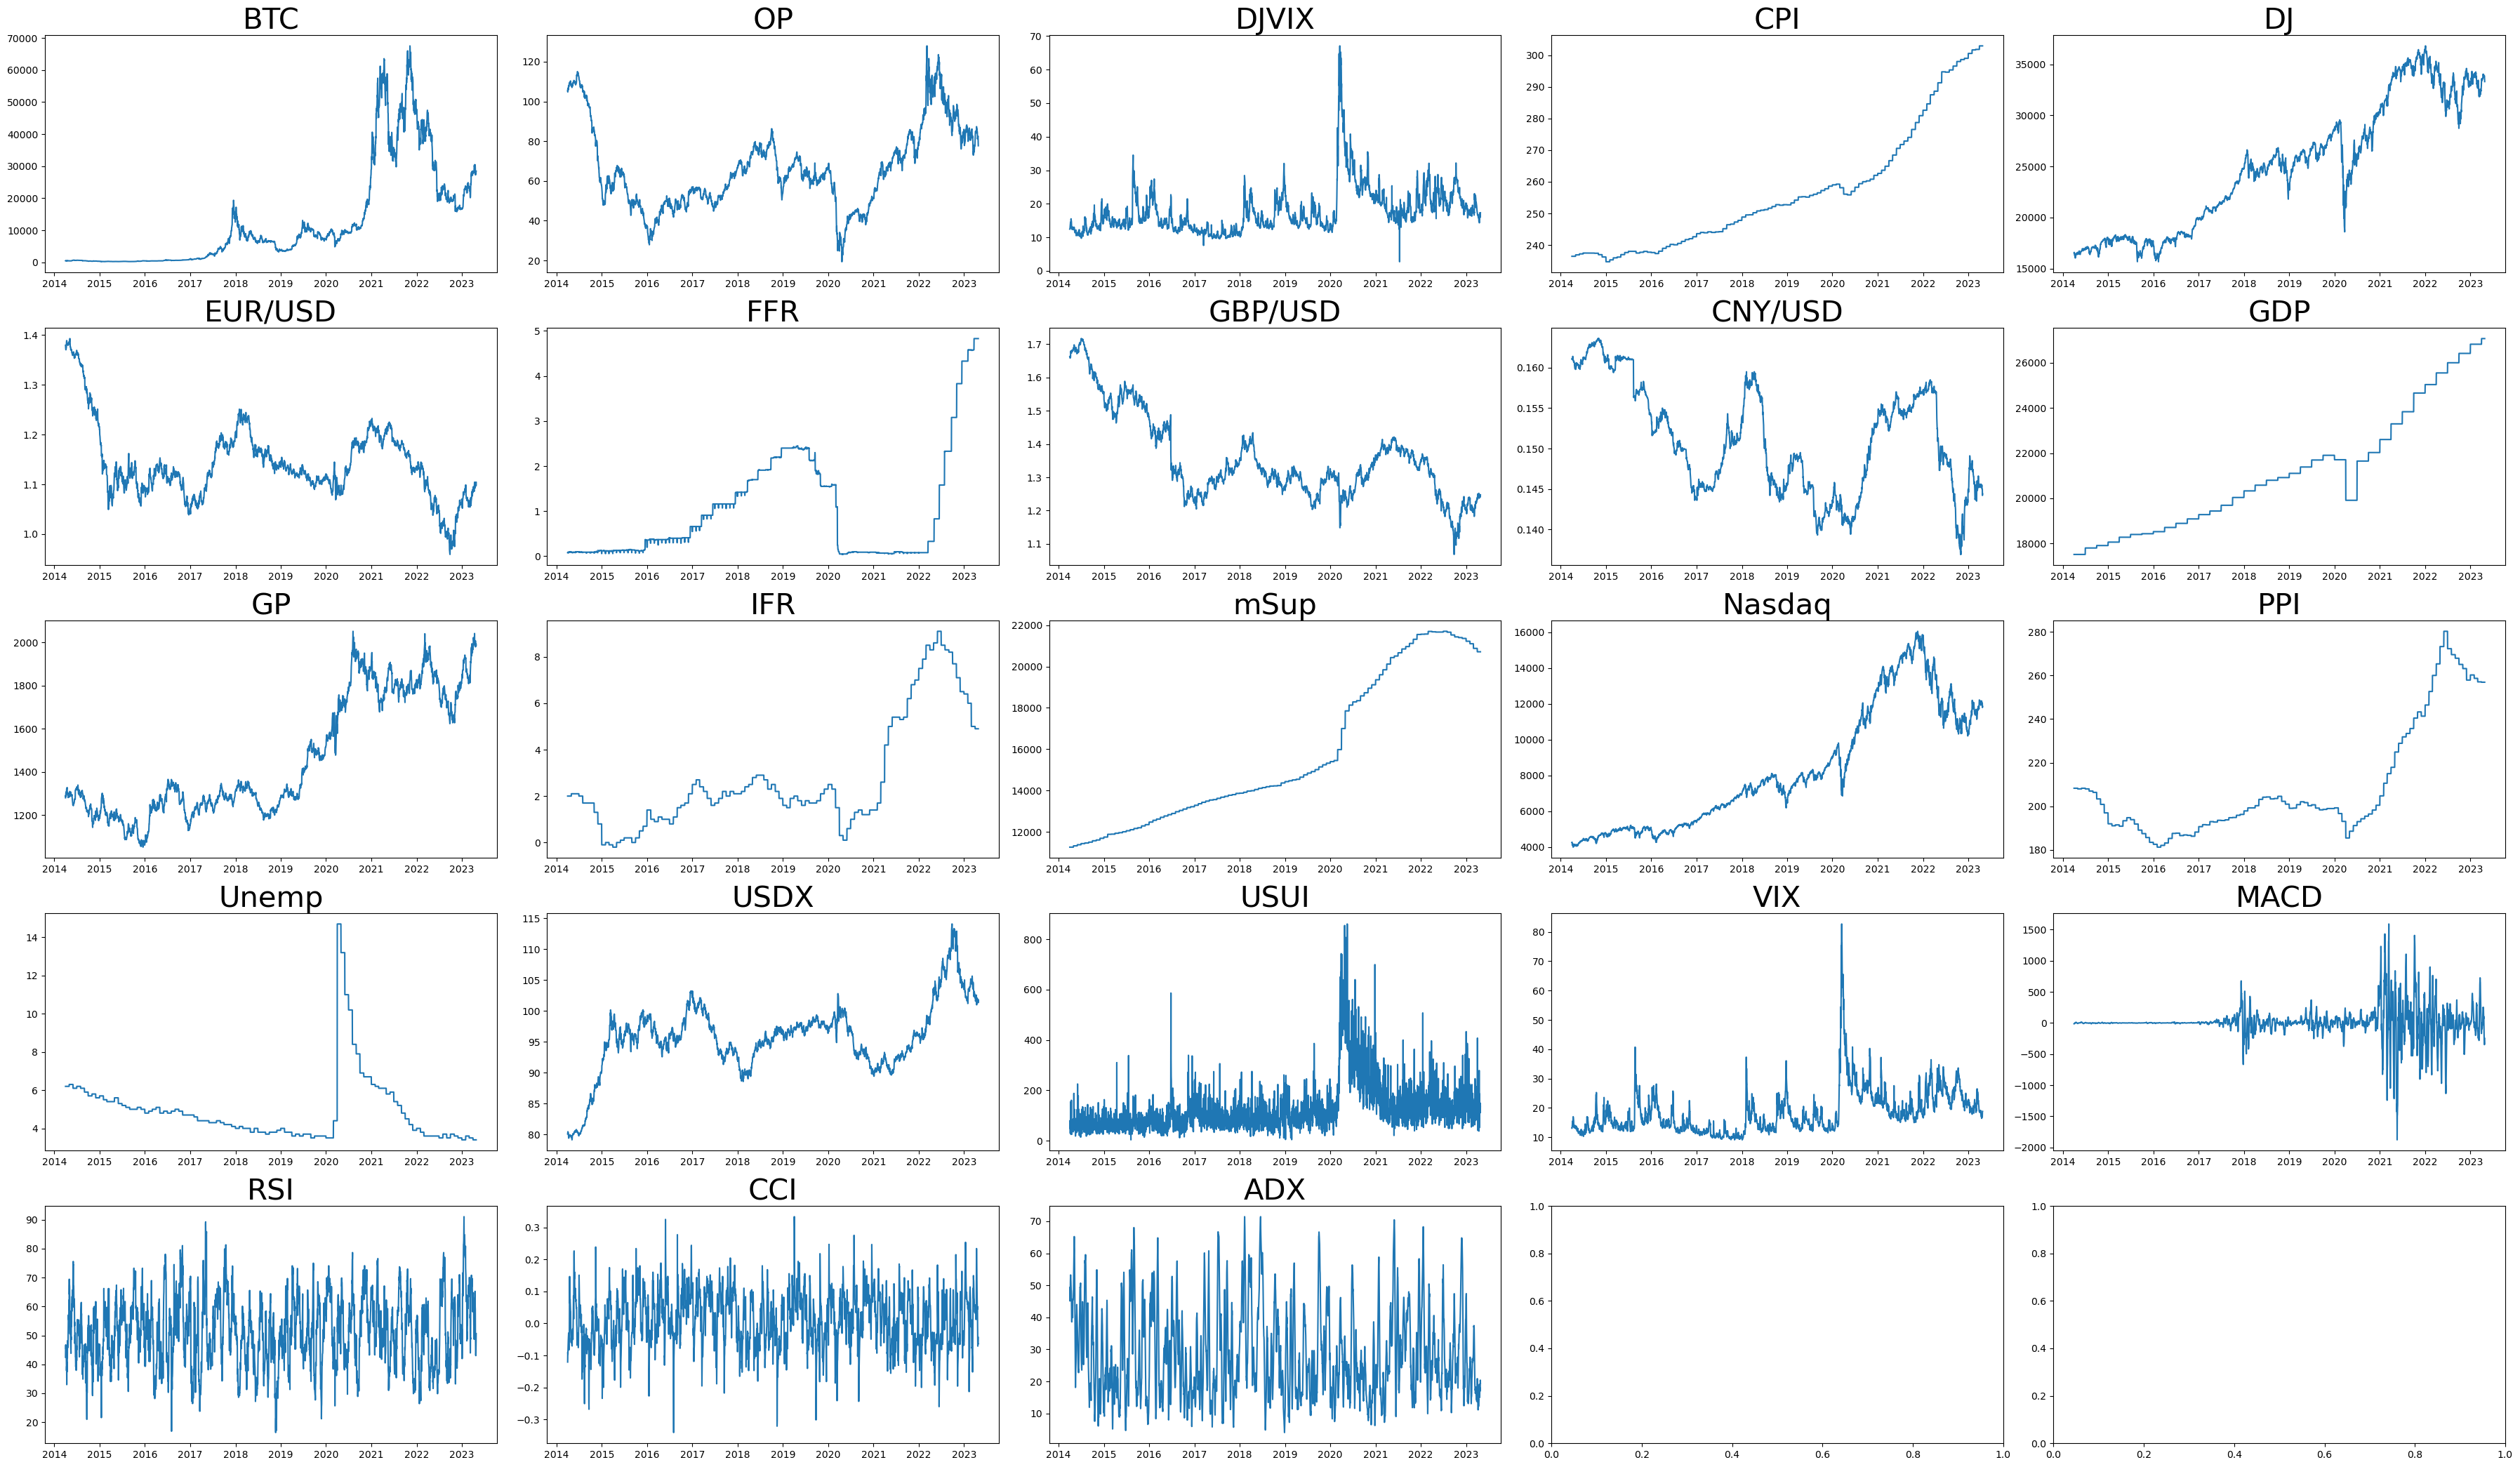

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math

# 設定圖形的行數和列數
num_rows = 5
num_cols = 5

# 計算需要的子圖數量（23個項目）
num_subplots = num_rows * num_cols

# 計算每個子圖的寬度和高度
subplot_width = 36 / num_cols
subplot_height = 21 / num_rows

# 創建圖形和底部軸，指定行數和列數，並將背景設置為透明
fig, axs = plt.subplots(num_rows, num_cols, figsize=(36, 21), facecolor='none')

# 遍歷每個項目並在相應的子圖中繪製
for i, column in enumerate(data.columns[1:24]):  # 1-23欄為原始資料
    row_idx = math.floor(i / num_cols)
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]
    ax.plot(data['Date'], data[column])
    ax.set_title(f'{column}', fontsize=30)

    # 設置日期刻度
    date_format = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.autoscale_view()
    ax.set_facecolor('none')

# 自動調整子圖的間距
plt.tight_layout()

# 顯示圖形
plt.show()


## Accumulated Return

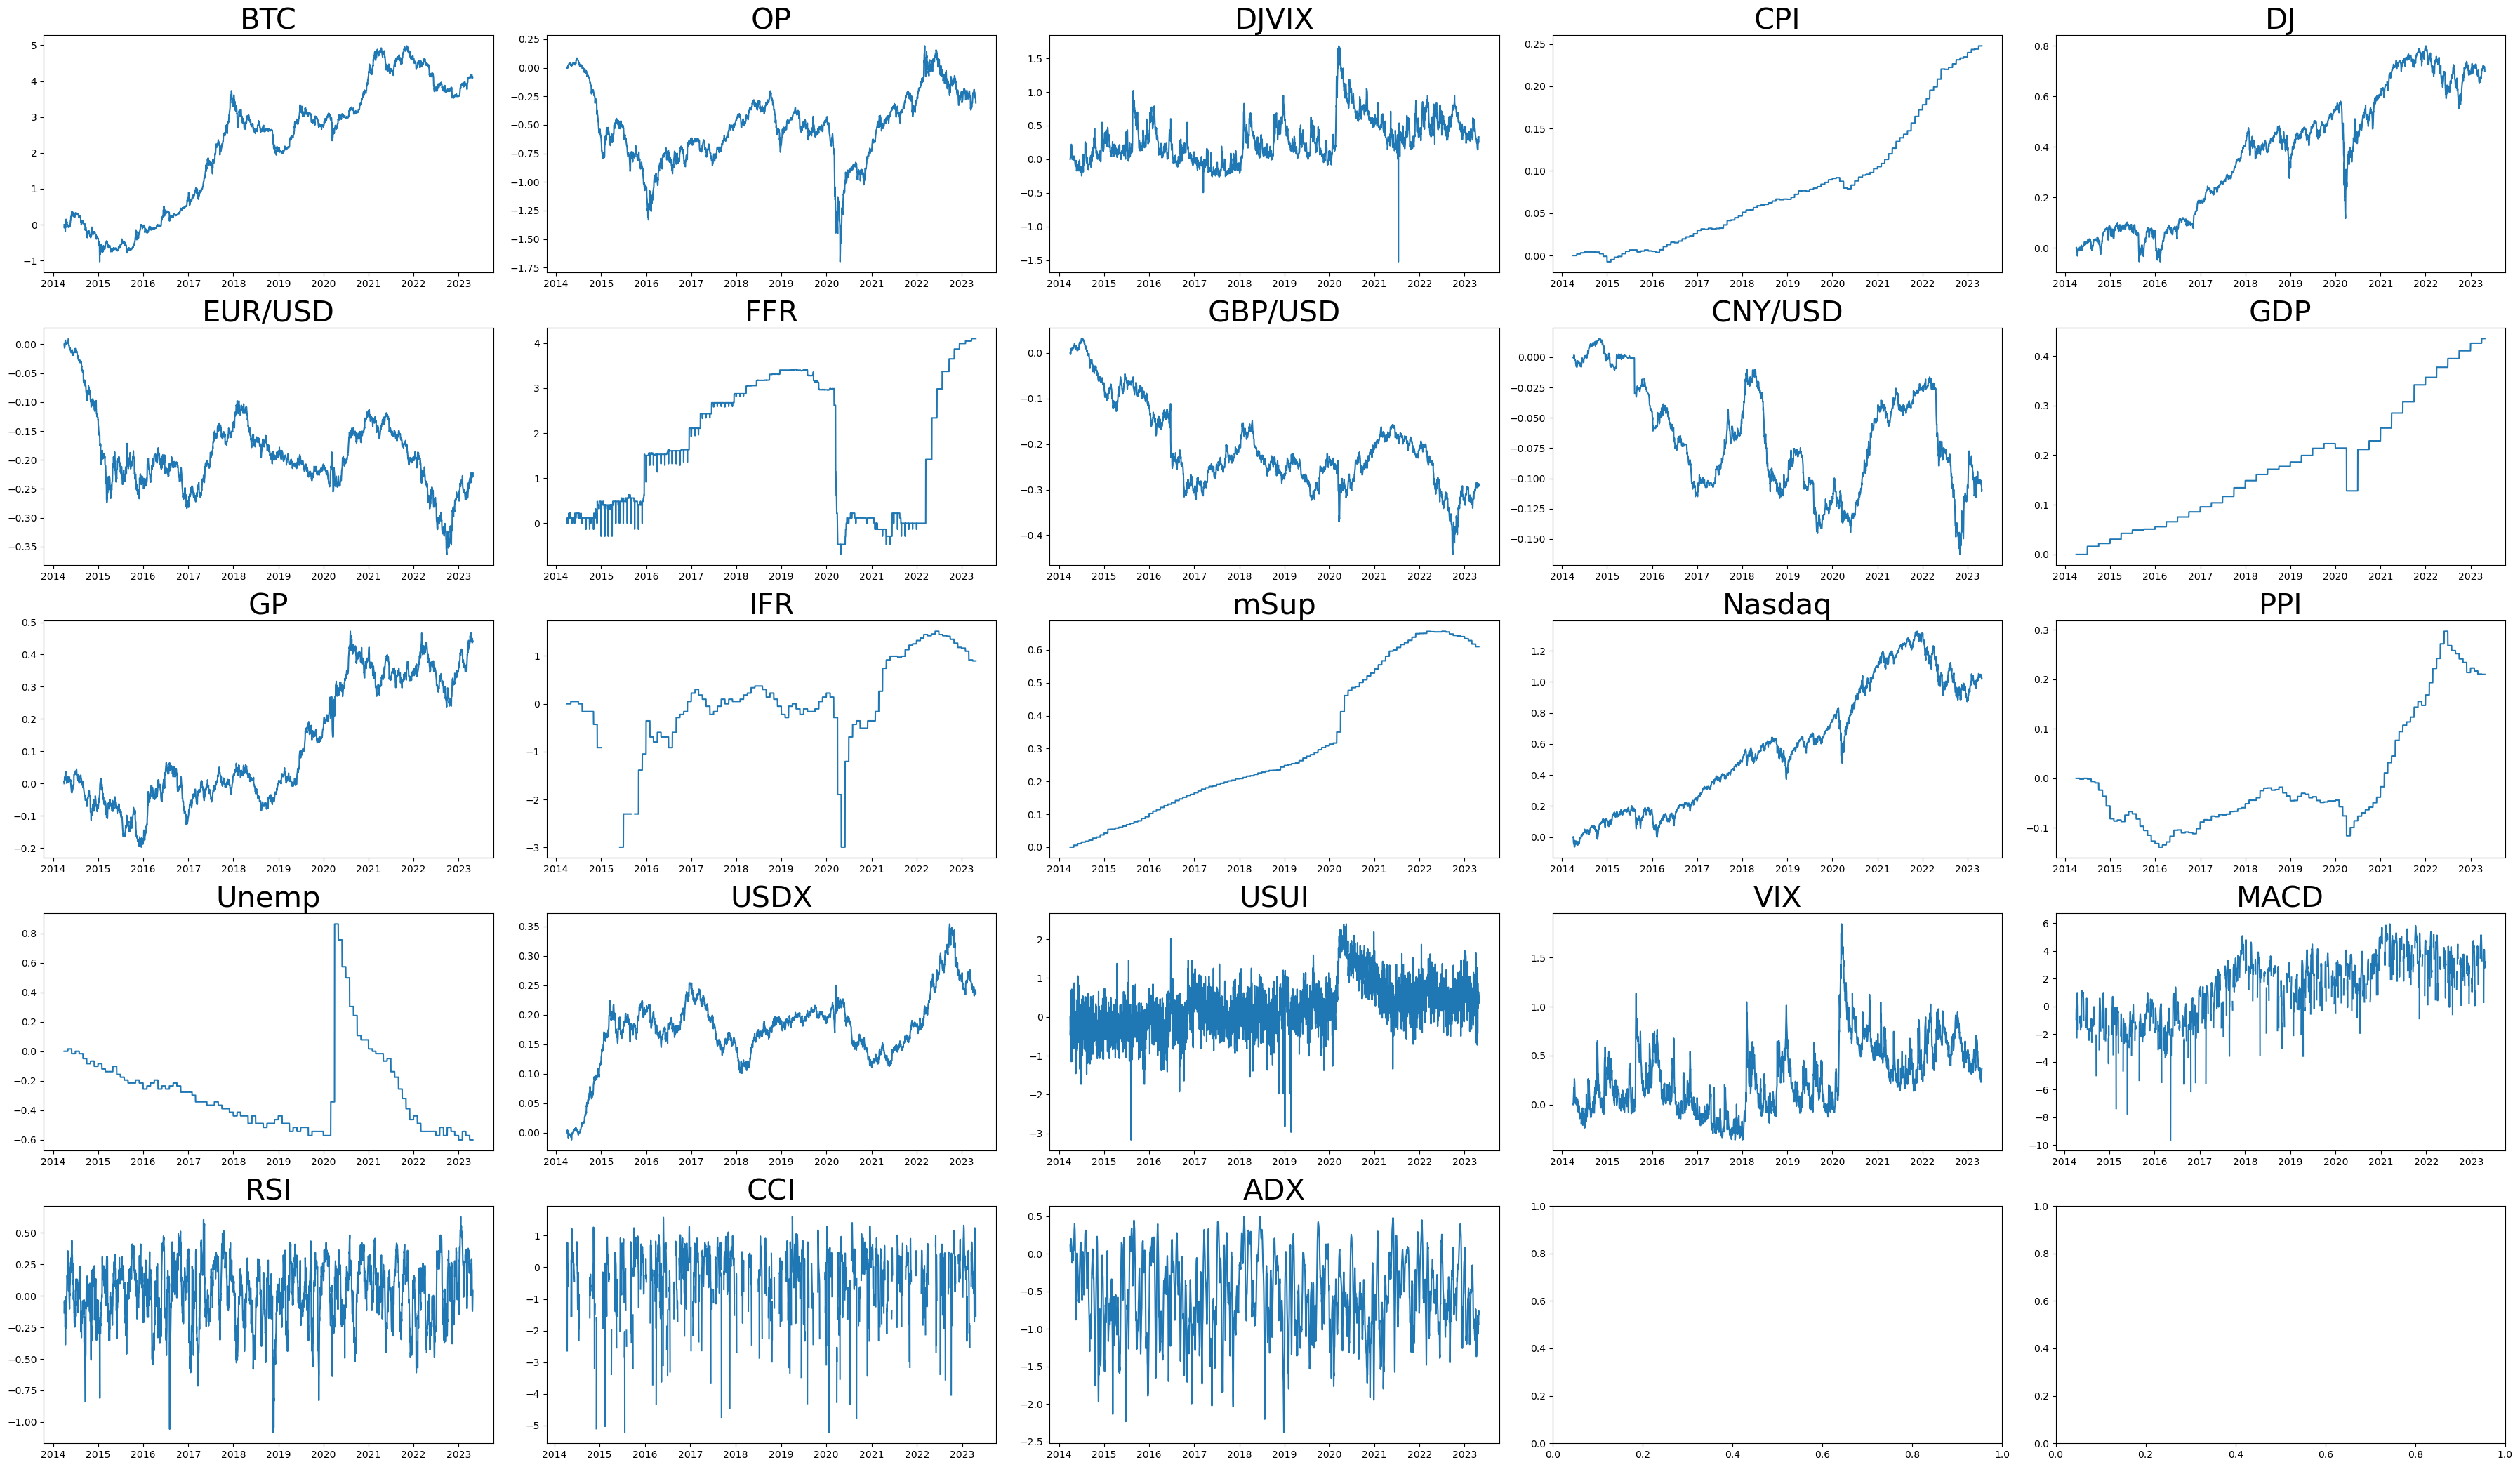

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math

# 設定圖形的行數和列數
num_rows = 5
num_cols = 5

# 計算需要的子圖數量（25個項目）
num_subplots = num_rows * num_cols

# 計算每個子圖的寬度和高度
subplot_width = 36 / num_cols
subplot_height = 21 / num_rows

# 創建圖形和底部軸，指定行數和列數，並將背景設置為透明
fig, axs = plt.subplots(num_rows, num_cols, figsize=(36, 21), facecolor='none')

# 遍歷每個項目並在相應的子圖中繪製
for i, column in enumerate(data.columns[70:93]):  # XX欄以後為 accumulated return
    row_idx = math.floor(i / num_cols)
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]
    ax.plot(data['Date'], data[column])
    #ax.set_title(f'{column}', fontsize=30)
    coin_name = column.split('_')[1]  # 用_分隔然後利用index取後面
    ax.set_title(f'{coin_name}', fontsize=30)
    
    # 設置日期刻度
    date_format = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.autoscale_view()
    ax.set_facecolor('none')

# 自動調整子圖的間距
plt.tight_layout()

# 顯示圖形
plt.show()


## Delta

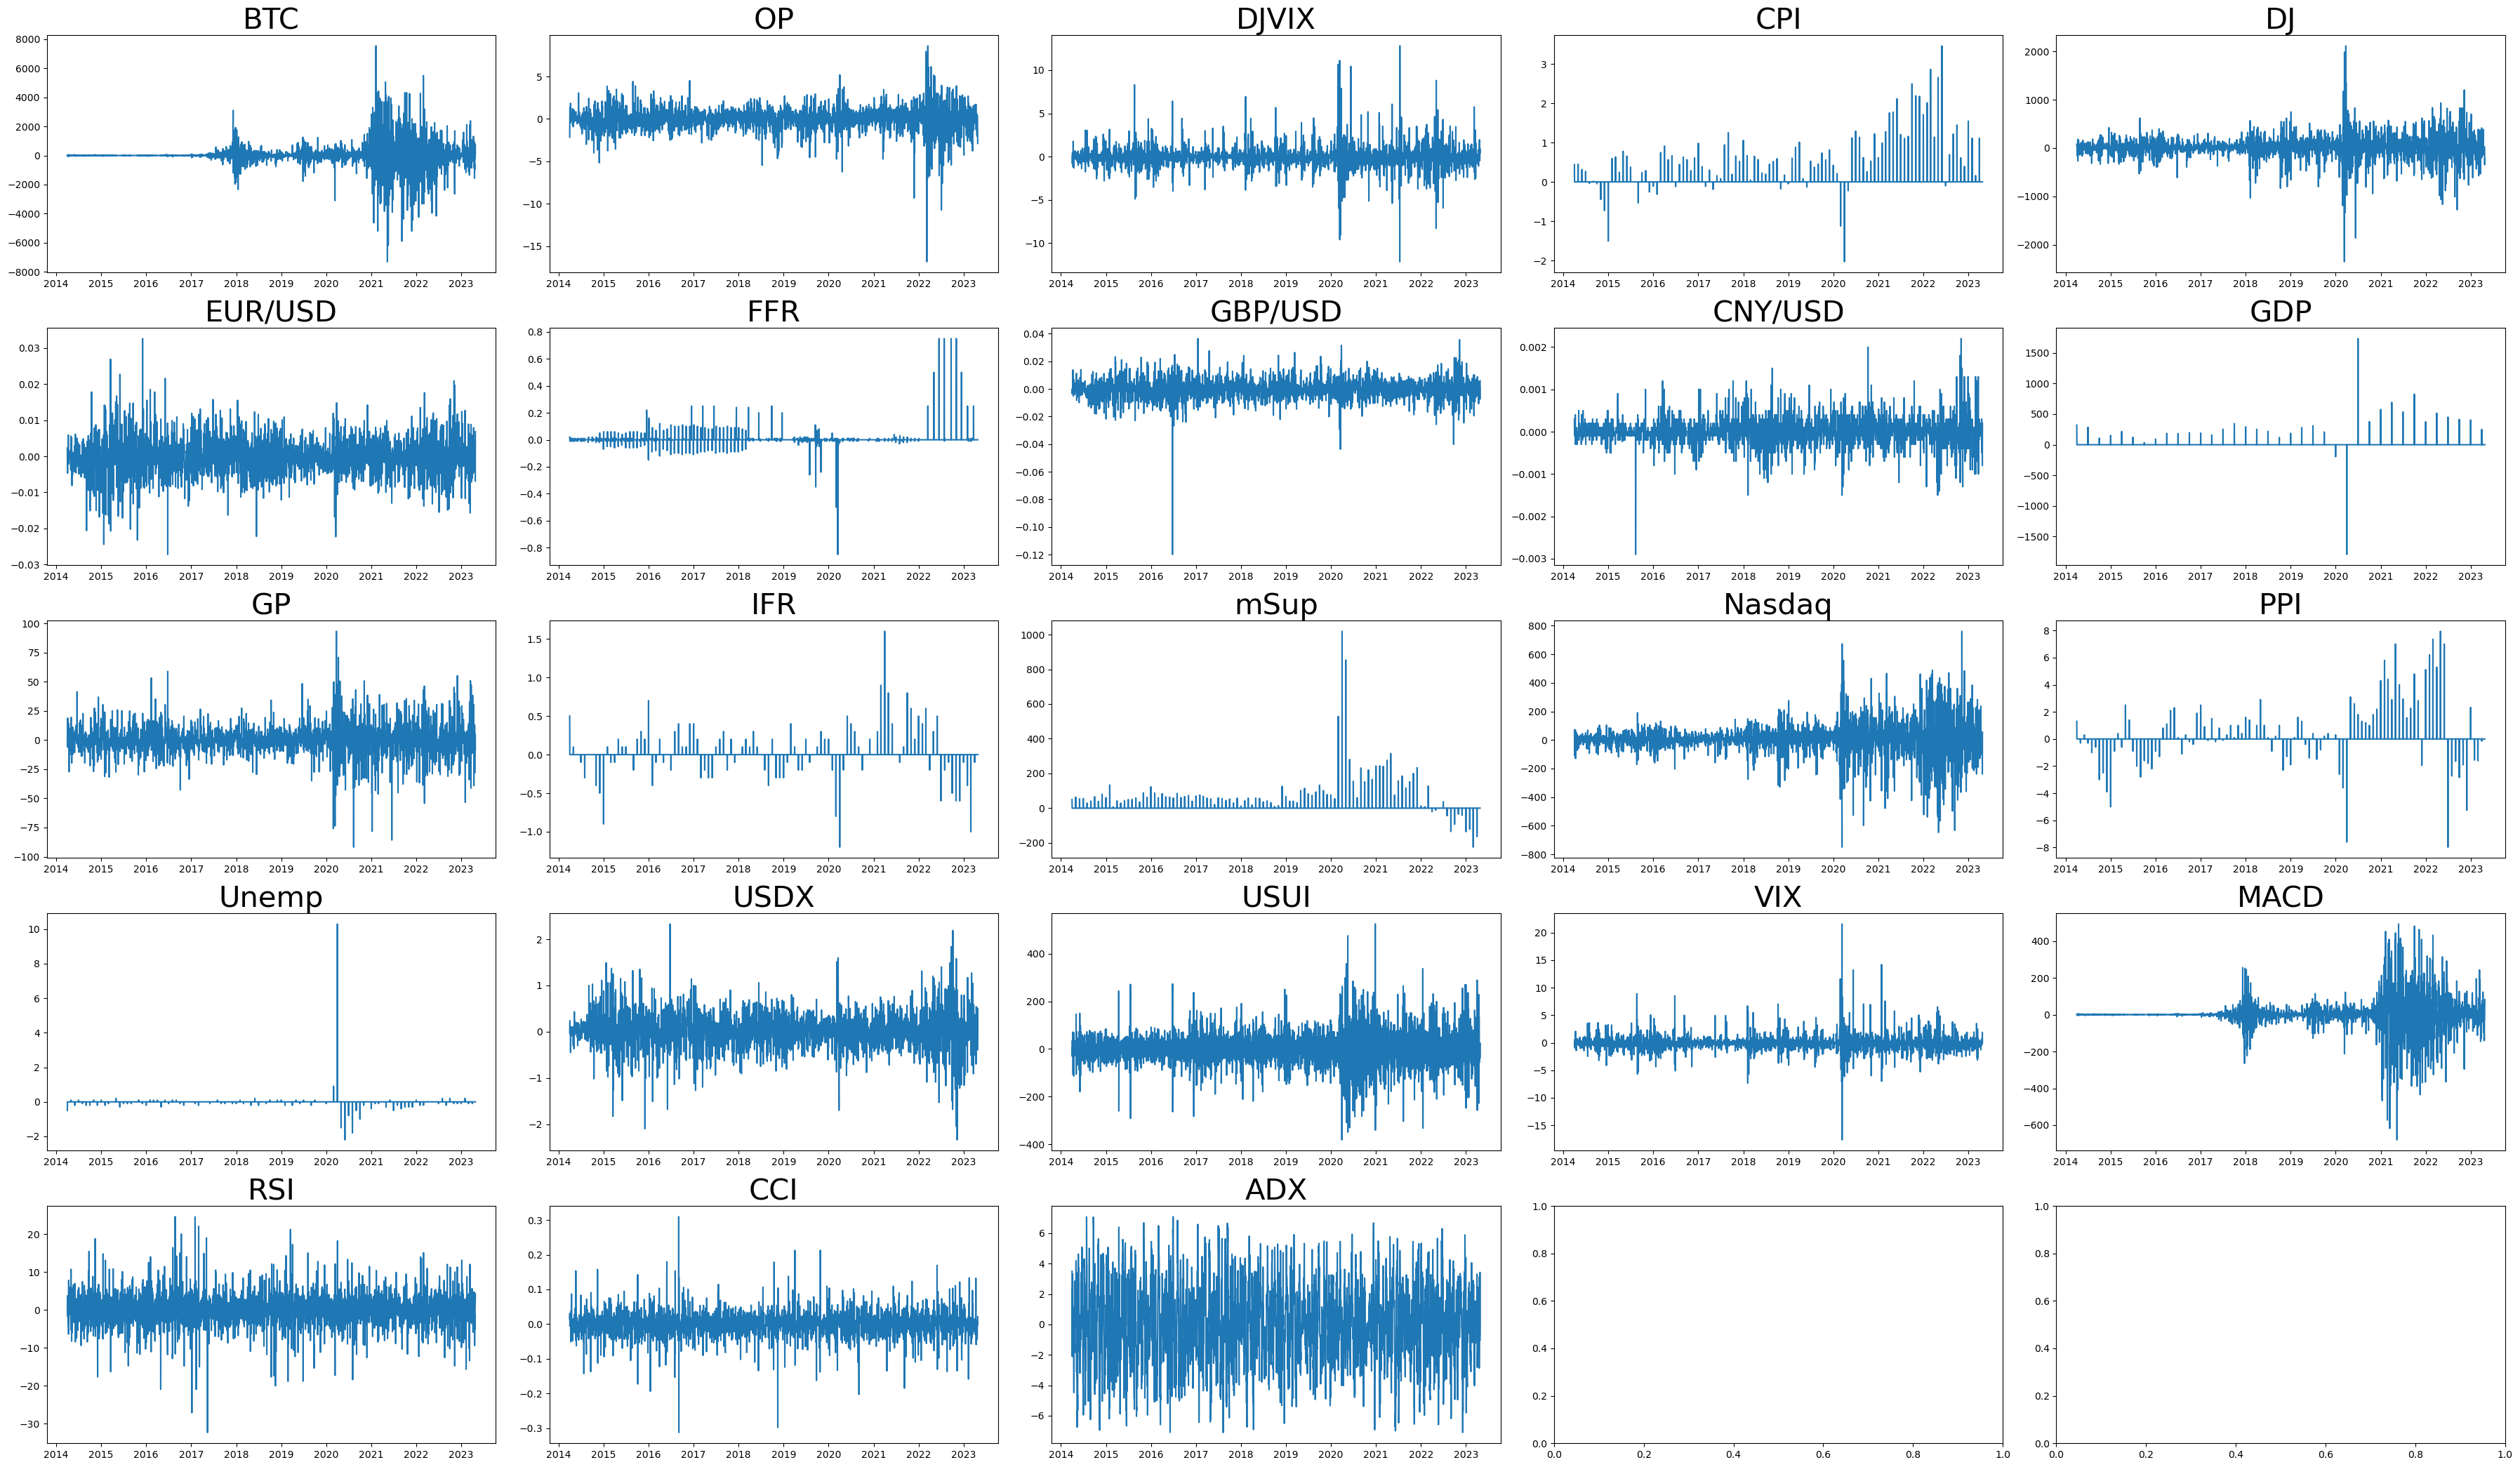

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math

# 設定圖形的行數和列數
num_rows = 5
num_cols = 5

# 計算需要的子圖數量（25個項目）
num_subplots = num_rows * num_cols

# 計算每個子圖的寬度和高度
subplot_width = 36 / num_cols
subplot_height = 21 / num_rows

# 創建圖形和底部軸，指定行數和列數，並將背景設置為透明
fig, axs = plt.subplots(num_rows, num_cols, figsize=(36, 21), facecolor='none')

# 遍歷每個項目並在相應的子圖中繪製
for i, column in enumerate(data.columns[27:50]):  # delta
    row_idx = math.floor(i / num_cols)
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]
    ax.plot(data['Date'], data[column])
    coin_name = column.split('_')[1]  # 用_分隔然後利用index取後面
    ax.set_title(f'{coin_name}', fontsize=30)
    
    # 設置日期刻度
    date_format = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.autoscale_view()
    ax.set_facecolor('none')

# 自動調整子圖的間距
plt.tight_layout()

# 顯示圖形
plt.show()


## Log Return

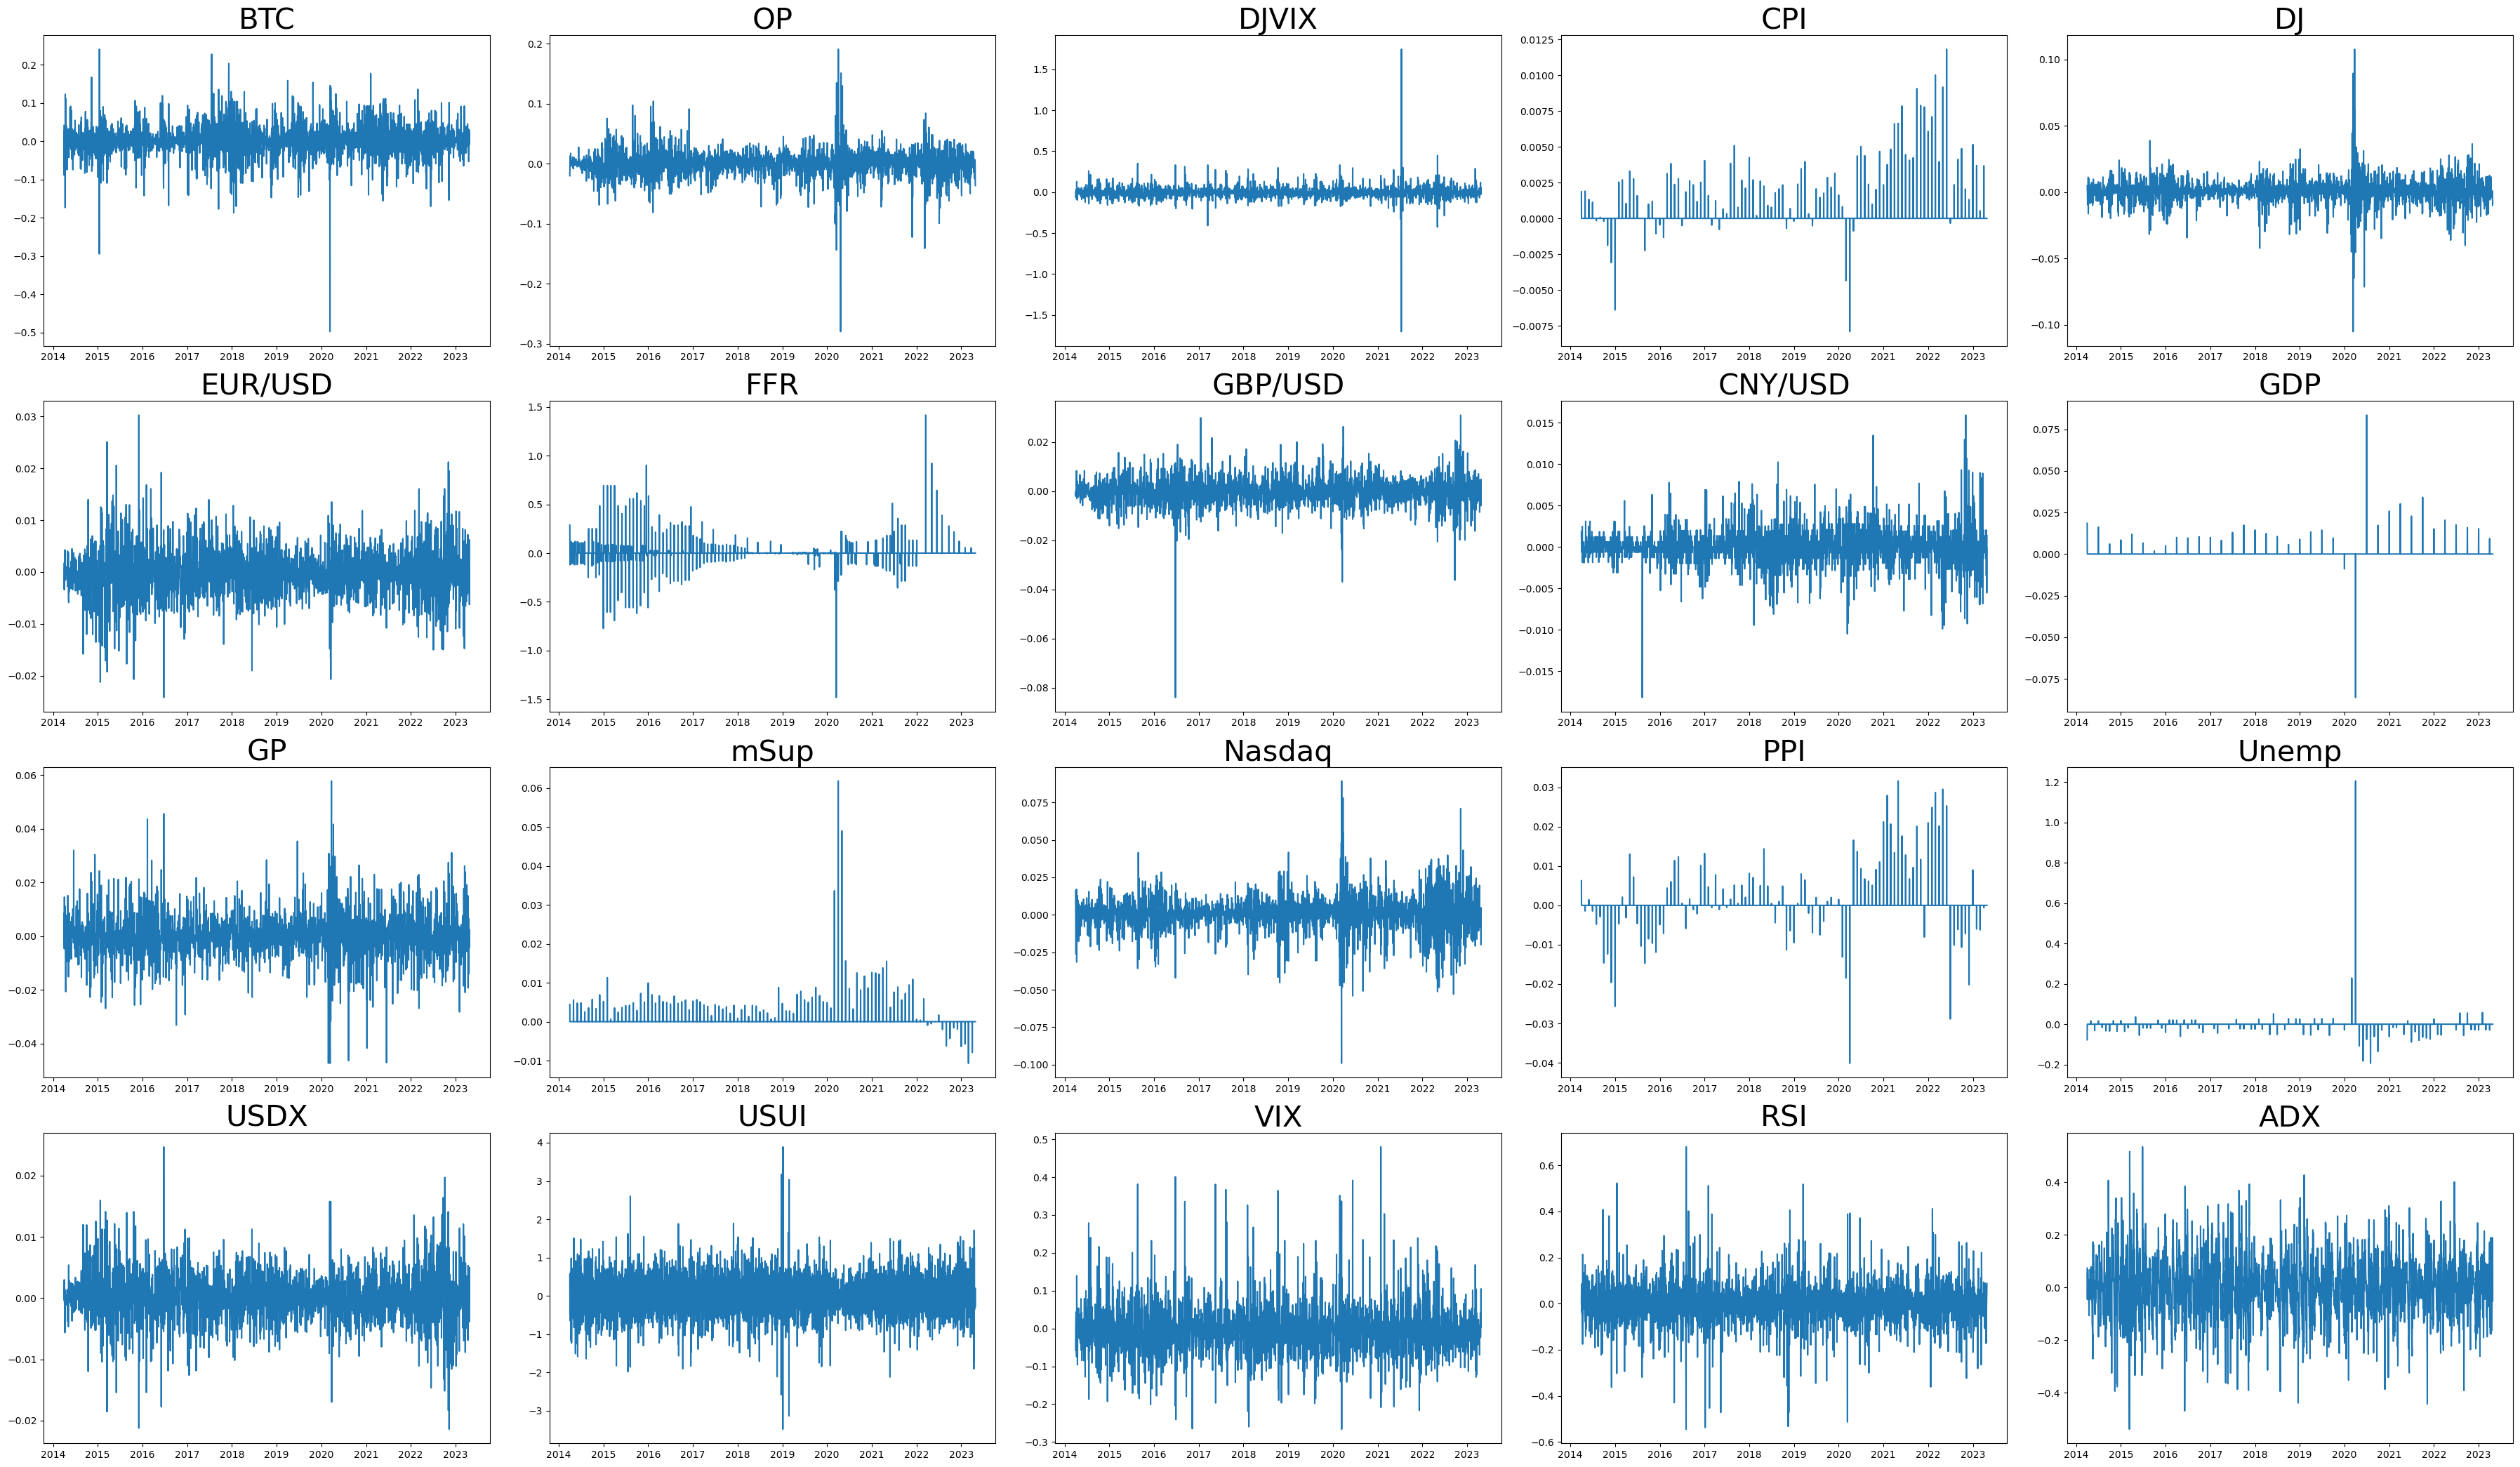

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math

# 設定圖形的行數和列數
num_rows = 4
num_cols = 5

# 計算需要的子圖數量（20個項目）
num_subplots = num_rows * num_cols

# 計算每個子圖的寬度和高度
subplot_width = 36 / num_cols
subplot_height = 21 / num_rows

# 創建圖形和底部軸，指定行數和列數，並將背景設置為透明
fig, axs = plt.subplots(num_rows, num_cols, figsize=(36, 21), facecolor='none')

# 遍歷每個項目並在相應的子圖中繪製
for i, column in enumerate(data.columns[50:70]):  # 技術指標的沒有，因為圖會壞掉
    row_idx = math.floor(i / num_cols)
    col_idx = i % num_cols
    ax = axs[row_idx, col_idx]
    ax.plot(data['Date'], data[column])
    coin_name = column.split('_')[1]  # 用_分隔然後利用index取後面
    ax.set_title(f'{coin_name}', fontsize=30)
    
    # 設置日期刻度
    date_format = mdates.DateFormatter('%Y')
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.autoscale_view()
    ax.set_facecolor('none')

# 自動調整子圖的間距
plt.tight_layout()

# 顯示圖形
plt.show()
